In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! git clone https://github.com/education454/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 34.38 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
import os 
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

In [ ]:
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')

test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[0:3])

['COVID19(50).jpg', 'COVID19(538).jpg', 'COVID-19 (11).jpg']


In [ ]:
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[0:3])

['NORMAL(1436).jpg', 'NORMAL(149).jpg', 'NORMAL(680).jpg']


In [ ]:
test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[0:3])

['COVID19(207).jpg', 'COVID19(483).jpg', 'COVID-19 (457).jpg']


In [ ]:
test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[0:3])

['NORMAL(551).jpg', 'NORMAL(1197).jpg', 'NORMAL(64).jpg']


In [ ]:
print('total number of images in train dataset is :', len(train_covid_names+train_normal_names))
print('total number of images in test dataset is :', len(test_covid_names+test_normal_names))

print('total number of images in train of covid is :', len(train_covid_names))
print('total number of images in train of normal is :', len(train_normal_names))


print('total number of images in test of covid is :', len(test_covid_names))
print('total number of images in test of normal is :', len(test_normal_names))

total number of images in train dataset is : 1811
total number of images in test dataset is : 484
total number of images in train of covid is : 545
total number of images in train of normal is : 1266
total number of images in test of covid is : 167
total number of images in test of normal is : 317


In [ ]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

['/content/datasets/Data/train/COVID19/COVID19(50).jpg', '/content/datasets/Data/train/COVID19/COVID19(538).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (11).jpg', '/content/datasets/Data/train/COVID19/COVID19(506).jpg', '/content/datasets/Data/train/COVID19/COVID19(53).jpg', '/content/datasets/Data/train/COVID19/COVID19(362).jpg', '/content/datasets/Data/train/COVID19/COVID19(537).jpg', '/content/datasets/Data/train/COVID19/COVID19(246).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1436).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(149).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(680).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(882).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(529).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(280).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(571).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1005).jpg']


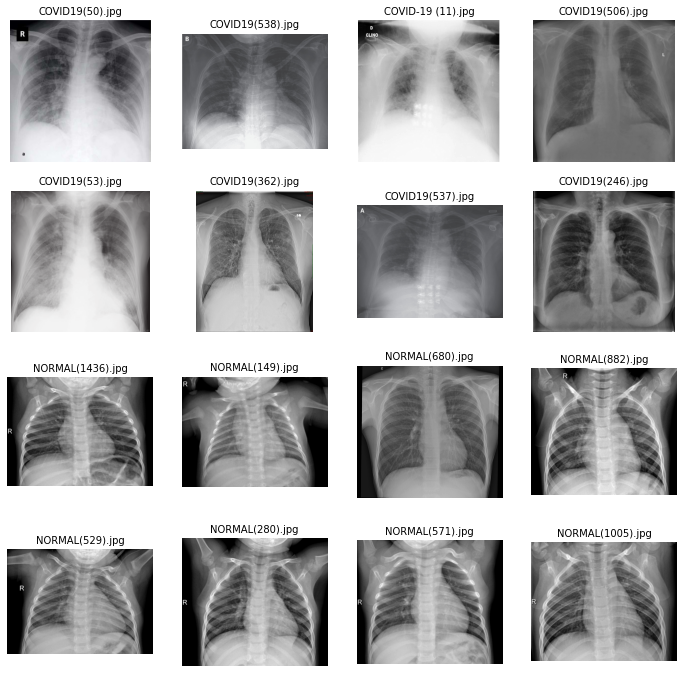

In [ ]:
# Now here we try to visualize of dataset 
# we plot a grid of 16 images here , eight images of covid and 8 images of normal

# set the number of rows and columns

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

# filenames from the covid and normal dir of the train dataset

next_covid_pic = [os.path.join(train_covid_dir, fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[0:8]]

# print the list of 8 images filenames , 8 from covid and 8 from the normal  in train datasets

print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic + next_normal_pic):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize =10)
  plt.imshow(img, cmap ='gray')
  
plt.show()


In [ ]:
# Generator for our training data

train_datagen = ImageDataGenerator(rescale= 1./255, validation_split = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Generator for our validation data

validation_datagen = ImageDataGenerator(rescale= 1./255)

# Generator for our test data

test_datagen = ImageDataGenerator(rescale= 1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir , 
                                                    target_size = (150,150),
                                                    subset = 'training', 
                                                    batch_size =32, 
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir , 
                                                    target_size = (150,150),
                                                    subset = 'validation', 
                                                    batch_size =32, 
                                                    class_mode = 'binary')

test_generator = train_datagen.flow_from_directory(test_dir , 
                                                    target_size = (150,150), 
                                                    batch_size =32, 
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
# Build CNN model

model = Sequential()

# Add the convolutional layer 


# filters, size of filters , padding, activation_function , input 
model.add(Conv2D(32,(5,5), padding ='SAME', activation = 'relu',input_shape=(150,150,3)))

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a Dropout layer 
model.add(Dropout(0.5))


# add another convolutinal layer 
model.add(Conv2D(64,(5,5), padding ='SAME', activation = 'relu'))

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a Dropout layer 
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# Add a dense layer :  amount of nodes , activation 
model.add(Dense(256, activation ='relu'))

# place a dropout layer 
# 0.5 drop out rate is recommended , half input nodes will be dropped at each update 
model.add(Dropout(0.5))


model.add(Dense(1, activation ='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [ ]:
# Compile and train model

from tensorflow.keras.optimizers import Adam 

In [ ]:
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(train_generator , 
                    epochs = 5, 
                    validation_data = validation_generator, 
                    validation_steps = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
46/46 [==============================] - 155s 3s/step - loss: 1.1308 - accuracy: 0.7585 - val_loss: 0.3436 - val_accuracy: 0.9156
Epoch 2/5
46/46 [==============================] - 152s 3s/step - loss: 0.2283 - accuracy: 0.9172 - val_loss: 0.1723 - val_accuracy: 0.9500
Epoch 3/5
46/46 [==============================] - 152s 3s/step - loss: 0.1780 - accuracy: 0.9365 - val_loss: 0.1157 - val_accuracy: 0.9688
Epoch 4/5
46/46 [==============================] - 154s 3s/step - loss: 0.1729 - accuracy: 0.9365 - val_loss: 0.1285 - val_accuracy: 0.9656
Epoch 5/5
46/46 [==============================] - 152s 3s/step - loss: 0.1569 - accuracy: 0.9434 - val_loss: 0.1879 - val_accuracy: 0.9469


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

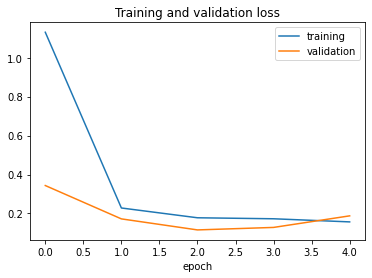

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

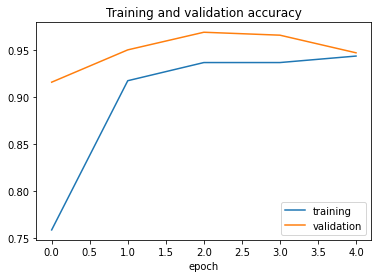

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

print('test acc : {} test loss : {}'.format(test_acc, test_loss))

16/16 [==============================] - 24s 1s/step - loss: 0.1852 - accuracy: 0.9401
test acc : 0.9400826692581177 test loss : 0.18519195914268494


In [ ]:
# Test the model with some images from our local computer 

import numpy as np
from google.colab import  files 
from keras.preprocessing import image 

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' +fn
  print(path)
  img = image .load_img(path, target_size =(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis= 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(fn)
  if classes == 0:
    print('This X-ray image is covid Positive')
  else:
    print('This X-ray image is covid Negative')

Saving covidChestXRay.jpg to covidChestXRay (2).jpg
/content/covidChestXRay.jpg
covidChestXRay.jpg
This X-ray image is covid Positive
